In [1]:
!pip install rise

You should consider upgrading via the 'c:\users\crystallwi.xiaujing\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



  Using cached rise-5.7.1-py2.py3-none-any.whl (4.3 MB)
  Using cached jupyter_client-7.1.2-py3-none-any.whl (130 kB)
  Using cached Send2Trash-1.8.0-py3-none-any.whl (18 kB)
  Using cached nest_asyncio-1.5.4-py3-none-any.whl (5.1 kB)
  Using cached Jinja2-3.0.3-py3-none-any.whl (133 kB)
  Using cached pyzmq-22.3.0-cp39-cp39-win_amd64.whl (1.0 MB)
  Using cached nbformat-5.1.3-py3-none-any.whl (178 kB)
  Using cached ipykernel-6.9.1-py3-none-any.whl (128 kB)
  Using cached traitlets-5.1.1-py3-none-any.whl (102 kB)
  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
  Using cached jupyter_core-4.9.2-py3-none-any.whl (86 kB)
  Using cached argon2_cffi-21.3.0-py3-none-any.whl (14 kB)
  Using cached tornado-6.1-cp39-cp39-win_amd64.whl (422 kB)
  Using cached entrypoints-0.4-py3-none-any.whl (5.3 kB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached jupyterlab_pygments-0.1.2-py2.py3-none-any.whl (4.6 kB)
  Using cached defusedxml-0.7.1-py2.py3

In [1]:
# Styling notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("rise.css", "r").read()
    return HTML(styles)
css_styling()

<div style="font-size:2em; text-align:center; margin-top:30px; margin-bottom:20px">Data Science Academy 8</div>
<hr>
<br>

<div style="font-size:4em; text-align:center; margin-bottom:30px; color:#00746E"><b>Time Series Data Pre-processing</b></div>


Pro-processing time series data is an important step in building a time series model. It gives important insights on the behaviour of the data. <b> Different forecasting model </b> have <b> different assumption</b> on the data and they work best on the suitable type of data. 
Below are some common pre-processing methods dealing with time series data. The dataset used is imported from `airline-passengers.csv`.

We will be using the `statsmodels` module for time-series preprocessing. More info: https://www.statsmodels.org/stable/index.html

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [3]:
data1 = pd.read_csv('../input/airline_passengers.csv')
data1.head(10)

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


<AxesSubplot:>

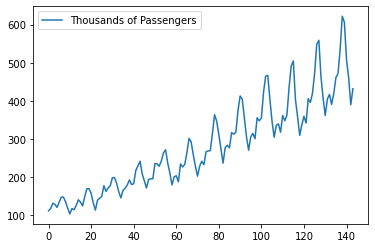

In [4]:
data1.plot()

In [5]:
# Converting our index colume to pandas datetime 
data1.index = pd.to_datetime(data1['Month'], format = "%Y-%m")
data1 = data1.drop(columns = "Month")
data1.head(10)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


## 1. STL Decomposition 

After converting the proper datetime column, the time series data can be decomposed into 3 components: <font color='#20419b'>'Trend', 'Seasonal' and 'Residual'</font>.

'Obeserved' 
is the orignal dataset before decomposing. 

Decomposing a time series data helps to visualize the <font color = 'blue'> trend and seasonality component</font>. A time series can be decomposed using <u>additive method</u> or <u> multiplicative</u> method.

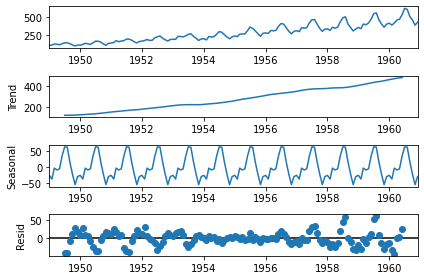

In [45]:
result1 = seasonal_decompose(data1, model='additive')
result1.plot()
pyplot.show()

In [50]:
values = pd.DataFrame({"observed": result1.observed.values, 
                       "trend":result1.trend.values, "seasonality": result1.seasonal.values,
                      "residuals":result1.resid.values})
values.head(15)

,observed,trend,seasonality,residuals
0,112.0,NaN,-24.748737,NaN
1,118.0,NaN,-36.188131,NaN
2,132.0,NaN,-2.241162,NaN
3,129.0,NaN,-8.036616,NaN
4,121.0,NaN,-4.506313,NaN
5,135.0,NaN,35.402778,NaN
6,148.0,126.791667,63.830808,-42.622475
7,148.0,127.250000,62.823232,-42.073232
8,136.0,127.958333,16.520202,-8.478535
9,119.0,128.583333,-20.642677,11.059343


In [19]:
tt = result1.trend
tt.dropna(axis = 0, inplace = True)
print (tt)

Month
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
                 ...    
1960-02-01    461.375000
1960-03-01    465.208333
1960-04-01    469.333333
1960-05-01    472.750000
1960-06-01    475.041667
Name: trend, Length: 132, dtype: float64


In [21]:
ss = result1.seasonal
ss

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [25]:
resid = result1.resid
resid.dropna(axis = 0, inplace = True)
resid

Month
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
1949-11-01    28.593434
                ...    
1960-02-01   -34.186869
1960-03-01   -43.967172
1960-04-01    -0.296717
1960-05-01     3.756313
1960-06-01    24.555556
Name: resid, Length: 132, dtype: float64

In [31]:
weight = result1.weights
weight.dropna(axis = 0, inplace = True)
weight

Month
1949-01-01    1.0
1949-02-01    1.0
1949-03-01    1.0
1949-04-01    1.0
1949-05-01    1.0
             ... 
1960-08-01    1.0
1960-09-01    1.0
1960-10-01    1.0
1960-11-01    1.0
1960-12-01    1.0
Name: weights, Length: 144, dtype: float64

In [39]:
weight2 = result2.weights
weight2.dropna(axis = 0, inplace = True)
weight2.unique

<bound method Series.unique of Month
1949-01-01    1.0
1949-02-01    1.0
1949-03-01    1.0
1949-04-01    1.0
1949-05-01    1.0
             ... 
1960-08-01    1.0
1960-09-01    1.0
1960-10-01    1.0
1960-11-01    1.0
1960-12-01    1.0
Name: weights, Length: 144, dtype: float64>

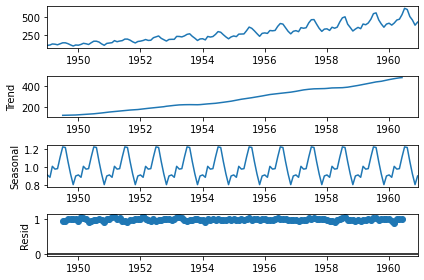

In [7]:
result2 = seasonal_decompose(data1, model='multiplicative')
result2.plot()
pyplot.show()

The lesser the variance of the residuals after decomposing, the better it is. The residuals of both method can be compared.

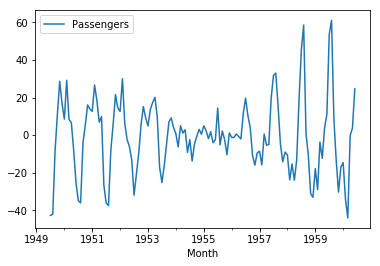

In [34]:
result1.resid.plot()

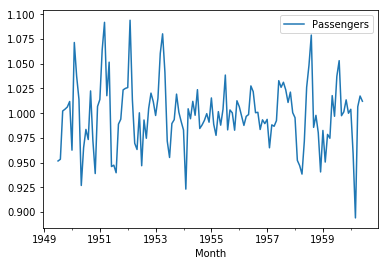

In [35]:
result2.resid.plot()

## 2. Checking Stationarity using ADF

Another aspect to check for time series data is <font color = '#28419b'> stationarity </font>. This can be done using <b> <font color = '28419b'>Augmented Dickey-Fuller</font></b> test with `adfuller` function as shown below. The test is applied on both the residuals of <u> additive decomposition and multiplicative decomposition</u>. 
The objective is to make the <b>time series data stationary</b>, as this helps to produce better forecast results.

In [36]:
adtest = adfuller(data1['Passengers'])
print('ADF Statistic: %f' % adtest[0])
print('p-value: %f' % adtest[1])
print('Critical Values:')
for key, value in adtest[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


The 'NAN' values in residuals of result2 should be remove before running the 'adfuller' function to prevent error.

In [37]:
result2.resid.head(20)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.951664
1949-08-01,0.953401
1949-09-01,1.002220


In [38]:
residual = result2.resid
residual = residual[~np.isnan(residual['Passengers'])]
adtest2 = adfuller(residual['Passengers'])
print('ADF Statistic: %f' % adtest2[0])
print('p-value: %f' % adtest2[1])
print('Critical Values:')
for key, value in adtest2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.415925
p-value: 0.000000
Critical Values:
	1%: -3.484
	5%: -2.885
	10%: -2.579


Both <b>residual plot</b> and <b>stationarity test</b> show that this time series data is considered 'multiplicative'. The result2 residuals have <font color='#20419b'>less variance and is stationary</font>.

## 3. ACF and PACF Test for auto-correlations/ determine significant lag

Another common analysis is autocorrelation and partial-autocorrelation. These gives insight on the 'moving average' and 'autocorrelation' component of the time series. Both acf plot and pacf plot are plotted with confidence interval to determine the significant lags to be focused on.

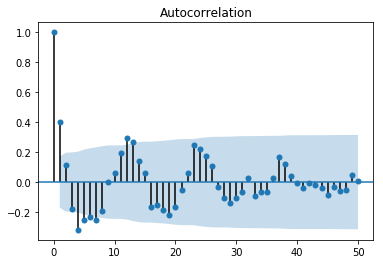

In [39]:
# Acf Plot
plot_acf(residual, lags= 50)
pyplot.show()

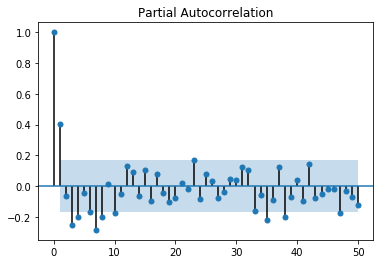

In [40]:
# Pacf plot
plot_pacf(residual, lags= 50)
pyplot.show()

## END